In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
df = sns.load_dataset("diamonds")
df = df[(df[["x","y","z"]]!=0).all(axis=1)]
X = df["carat"].values
y = df["price"].values

In [26]:
print(X.shape, y.shape)

(53920,) (53920,)


In [27]:
X = X.reshape(-1, 1)
print(X.shape)

(53920, 1)


In [28]:
model_1 = LinearRegression()

In [29]:
model_1.fit(X, y)

LinearRegression()

In [30]:
print(model_1.coef_, model_1.intercept_)
print(model_1.score(X, y))

[7755.76725406] -2255.768787038086
0.8493319314553118


In [31]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [32]:
test = df[["carat","depth","table","price","x","y","z"]]
test.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [33]:
test.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [34]:
model_2 = LinearRegression()
X = test[["carat","depth","table"]].values
model_2.fit(X, y)

LinearRegression()

In [35]:
print(model_2.coef_, model_2.intercept_)
print(model_2.score(X, y))

[7858.06319933 -151.44532394 -104.32835351] 13008.681991100293
0.8536799005599032


In [51]:
X_pred = np.linspace(0,3,10).reshape(-1,1)
y_pred_1 = model_1.predict(X_pred)

Text(0, 0.5, 'price')

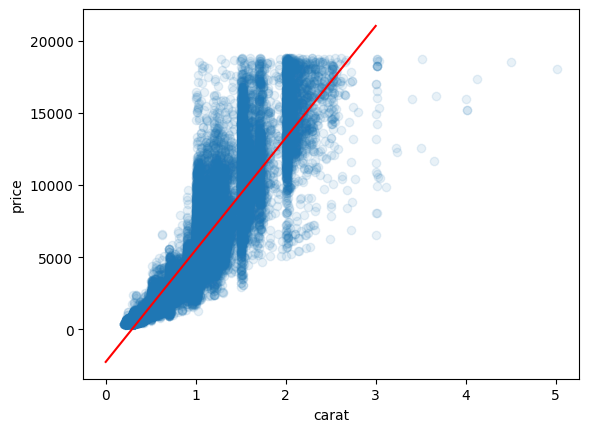

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df["carat"].values, df["price"].values, alpha=0.1)
plt.plot(X_pred, y_pred_1, "red")
plt.xlabel("carat")
plt.ylabel("price")